### LDA(Linear Discriminant Analysis
<img src='../img/LDA.png' width='70%' align='left' />

### 붓꽃 데이터 셋에 LDA 적용하기 

In [1]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

In [2]:
lda = LinearDiscriminantAnalysis(n_components=2)
# fit()호출 시, target값 입력되어야 함
# LDA는 지도학습이기 때문에!!
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


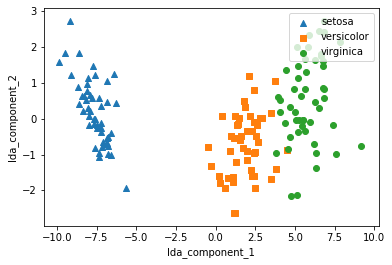

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns=['lda_component_1','lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda,columns=lda_columns)
irisDF_lda['target']=iris.target

#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot
for i, marker in enumerate(markers):
    x_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
    y_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_2']

    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()

In [5]:
irisDF_lda

,lda_component_1,lda_component_2,target
0,-8.061800,0.300421,0
1,-7.128688,-0.786660,0
2,-7.489828,-0.265384,0
3,-6.813201,-0.670631,0
4,-8.132309,0.514463,0
...,...,...,...
145,5.645003,1.677717,2
146,5.179565,-0.363475,2
147,4.967741,0.821141,2
148,5.886145,2.345091,2


In [4]:
import numpy as np
print(lda.explained_variance_ratio_, "\nSum: {:.3f}".format(np.sum(lda.explained_variance_ratio_)))
# 전체 데이터 셋의 분산(변동성)을 100% 표현함..!

[0.9912126 0.0087874] 
Sum: 1.000


* pca와 분류 결과 비교

In [8]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 사이킷런 내장 데이터 셋 API 호출
iris = load_iris()

# 넘파이 데이터 셋을 Pandas DataFrame으로 변환
columns = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data , columns=columns)
irisDF['target']=iris.target
irisDF.head(3)
from sklearn.preprocessing import StandardScaler

iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:, :-1])
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

#fit( )과 transform( ) 을 호출하여 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)
pca_columns=['pca_component_1','pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca,columns=pca_columns)
irisDF_pca['target']=iris.target

(150, 2)


In [6]:
import seaborn as sns

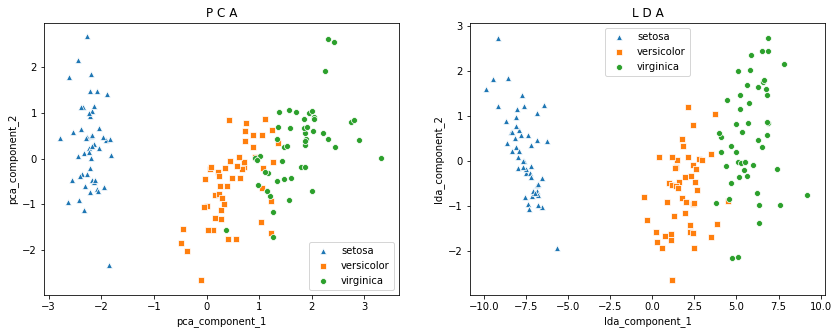

In [9]:
f, (ax1, ax2 )= plt.subplots(1,2, figsize=(14,5))

#setosa를 세모, versicolor를 네모, virginica를 동그라미로 표시
markers=['^', 's', 'o']

for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    sns.scatterplot(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i], ax=ax1)

ax1.set_title('P C A')

for i, marker in enumerate(markers):
    x_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
    y_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_2']
    sns.scatterplot(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i], ax=ax2)
    
ax2.set_title('L D A')
    
plt.show()

* classification에선 PCA보다 LDA가 좀 더 나은 것 같음. 근데 이건 LDA가 지도학습이라서 그런 것 같음
